In [54]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu 

In [55]:
# Define Cliff’s Delta
from __future__ import division

def cliffsDelta(lst1,lst2,
                dull = [0.147, # small
                        0.33,  # medium
                        0.474 # large
                        ][2] ): 
  "Returns true if there are more than 'dull' differences"
  m, n = len(lst1), len(lst2)
  lst2 = sorted(lst2)
  j = more = less = 0
  for repeats,x in runs(sorted(lst1)):
    while j <= (n - 1) and lst2[j] <  x: 
      j += 1
    more += j*repeats
    while j <= (n - 1) and lst2[j] == x: 
      j += 1
    less += (n - j)*repeats
  d= (more - less) / (m*n)
  return abs(d)  > dull
  
def runs(lst):
  "Iterator, chunks repeated values"
  for j,two in enumerate(lst):
    if j == 0:
      one,i = two,0
    if one!=two:
      yield j - i,one
      i = j
    one=two
  yield j - i + 1,two
 
def _cliffsDelta():
  "demo function"
  lst1=[1,2,3,4,5,6,7]
  for r in [1.01,1.1,1.21, 1.5, 2]:
    lst2=map(lambda x: x*r,lst1)
    print(r,cliffsDelta(lst1,lst2)) # should return False

In [56]:
test_cases_with_log = [
    "org.apache.zookeeper.ClientReconnectTest",
    "org.apache.zookeeper.common.TimeTest",
    "org.apache.zookeeper.SaslAuthTest",
    "org.apache.zookeeper.server.CRCTest",
    "org.apache.zookeeper.server.DataTreeTest",
    "org.apache.zookeeper.server.DataTreeUnitTest",
    "org.apache.zookeeper.server.DeserializationPerfTest",
    "org.apache.zookeeper.server.InvalidSnapCountTest",
    "org.apache.zookeeper.server.InvalidSnapshotTest",
    "org.apache.zookeeper.server.NettyServerCnxnTest",
    "org.apache.zookeeper.server.NIOServerCnxnTest",
    "org.apache.zookeeper.server.persistence.FileTxnLogTest",
    "org.apache.zookeeper.server.persistence.FileTxnSnapLogTest",
    "org.apache.zookeeper.server.PrepRequestProcessorTest",
    "org.apache.zookeeper.server.PurgeTxnTest",
    "org.apache.zookeeper.server.quorum.auth.QuorumAuthUpgradeTest",
    "org.apache.zookeeper.server.quorum.auth.QuorumDigestAuthTest",
    "org.apache.zookeeper.server.quorum.auth.QuorumKerberosAuthTest",
    "org.apache.zookeeper.server.quorum.auth.QuorumKerberosHostBasedAuthTest",
    "org.apache.zookeeper.server.quorum.CnxManagerTest",
    "org.apache.zookeeper.server.quorum.EphemeralNodeDeletionTest",
    "org.apache.zookeeper.server.quorum.FLEBackwardElectionRoundTest",
    "org.apache.zookeeper.server.quorum.FLECompatibilityTest",
    "org.apache.zookeeper.server.quorum.FLEDontCareTest",
    "org.apache.zookeeper.server.quorum.FLELostMessageTest",
    "org.apache.zookeeper.server.quorum.LeaderBeanTest",
    "org.apache.zookeeper.server.quorum.LeaderWithObserverTest",
    "org.apache.zookeeper.server.quorum.LearnerTest",
    "org.apache.zookeeper.server.quorum.QuorumCnxManagerTest",
    "org.apache.zookeeper.server.quorum.QuorumPeerMainTest",
    "org.apache.zookeeper.server.quorum.WatchLeakTest",
    "org.apache.zookeeper.server.quorum.Zab1_0Test",
    "org.apache.zookeeper.server.SerializationPerfTest",
    "org.apache.zookeeper.server.SessionTrackerTest",
    "org.apache.zookeeper.server.ZooKeeperServerMainTest",
    "org.apache.zookeeper.server.ZooKeeperServerStartupTest",
    "org.apache.zookeeper.server.ZxidRolloverTest",
    "org.apache.zookeeper.test.ACLCountTest",
    "org.apache.zookeeper.test.ACLRootTest",
    "org.apache.zookeeper.test.ACLTest",
    "org.apache.zookeeper.test.AsyncHammerTest",
    "org.apache.zookeeper.test.AsyncOpsTest",
    "org.apache.zookeeper.test.AsyncTest",
    "org.apache.zookeeper.test.AuthTest",
    "org.apache.zookeeper.test.BufferSizeTest",
    "org.apache.zookeeper.test.ChrootAsyncTest",
    "org.apache.zookeeper.test.ChrootClientTest",
    "org.apache.zookeeper.test.ChrootTest",
    "org.apache.zookeeper.test.ClientHammerTest",
    "org.apache.zookeeper.test.ClientPortBindTest",
    "org.apache.zookeeper.test.ClientTest",
    "org.apache.zookeeper.test.DisconnectedWatcherTest",
    "org.apache.zookeeper.test.FLENewEpochTest",
    "org.apache.zookeeper.test.FLEPredicateTest",
    "org.apache.zookeeper.test.FLERestartTest",
    "org.apache.zookeeper.test.FLETest",
    "org.apache.zookeeper.test.FLEZeroWeightTest",
    "org.apache.zookeeper.test.FollowerResyncConcurrencyTest",
    "org.apache.zookeeper.test.FollowerTest",
    "org.apache.zookeeper.test.FourLetterWordsQuorumTest",
    "org.apache.zookeeper.test.FourLetterWordsTest",
    "org.apache.zookeeper.test.FourLetterWordsWhiteListTest",
    "org.apache.zookeeper.test.GetChildren2Test",
    "org.apache.zookeeper.test.HierarchicalQuorumTest",
    "org.apache.zookeeper.test.InvalidSnapshotTest",
    "org.apache.zookeeper.test.LENonTerminateTest",
    "org.apache.zookeeper.test.LETest",
    "org.apache.zookeeper.test.LoadFromLogNoServerTest",
    "org.apache.zookeeper.test.LoadFromLogTest",
    "org.apache.zookeeper.test.MaxCnxnsTest",
    "org.apache.zookeeper.test.MultiTransactionTest",
    "org.apache.zookeeper.test.NioNettySuiteHammerTest",
    "org.apache.zookeeper.test.NioNettySuiteTest",
    "org.apache.zookeeper.test.NonRecoverableErrorTest",
    "org.apache.zookeeper.test.NullDataTest",
    "org.apache.zookeeper.test.ObserverHierarchicalQuorumTest",
    "org.apache.zookeeper.test.ObserverLETest",
    "org.apache.zookeeper.test.ObserverQuorumHammerTest",
    "org.apache.zookeeper.test.ObserverTest",
    "org.apache.zookeeper.test.QuorumHammerTest",
    "org.apache.zookeeper.test.QuorumQuotaTest",
    "org.apache.zookeeper.test.QuorumTest",
    "org.apache.zookeeper.test.QuorumZxidSyncTest",
    "org.apache.zookeeper.test.ReadOnlyModeTest",
    "org.apache.zookeeper.test.RecoveryTest",
    "org.apache.zookeeper.test.RepeatStartupTest",
    "org.apache.zookeeper.test.RestoreCommittedLogTest",
    "org.apache.zookeeper.test.SaslAuthDesignatedClientTest",
    "org.apache.zookeeper.test.SaslAuthDesignatedServerTest",
    "org.apache.zookeeper.test.SaslAuthFailDesignatedClientTest",
    "org.apache.zookeeper.test.SaslAuthFailNotifyTest",
    "org.apache.zookeeper.test.SaslAuthFailTest",
    "org.apache.zookeeper.test.SaslAuthMissingClientConfigTest",
    "org.apache.zookeeper.test.SessionInvalidationTest",
    "org.apache.zookeeper.test.SessionTest",
    "org.apache.zookeeper.test.SessionTimeoutTest",
    "org.apache.zookeeper.test.StandaloneTest",
    "org.apache.zookeeper.test.StatTest",
    "org.apache.zookeeper.test.SyncCallTest",
    "org.apache.zookeeper.test.TruncateTest",
    "org.apache.zookeeper.test.UpgradeTest",
    "org.apache.zookeeper.test.WatcherFuncTest",
    "org.apache.zookeeper.test.WatcherTest",
    "org.apache.zookeeper.test.ZkDatabaseCorruptionTest",
    "org.apache.zookeeper.test.ZooKeeperQuotaTest",
    "org.apache.zookeeper.ZooKeeperTest"
]

In [62]:
orginal_logs_dir = r"F:\Data\zookeeper_test_logs_selected_result_20\test_bench_zookeeper_logs_origin"
diable_guards_logs_dir = r"F:\Data\zookeeper_test_logs_selected_result_20\test_bench_zookeeper_logs_disable_guards"
# orginal_logs_dir = r"F:\Data\test_bench_zookeeper_logs_origin_50-100"
# diable_guards_logs_dir = r"F:\Data\test_bench_zookeeper_logs_disable_guards_50-100"

In [63]:
runtime = re.compile(r'.*Total time: (\w+) minutes (\w+) seconds.*')

In [64]:
runtime.findall("This is a test \n Total time: 30 minutes 48 seconds")

[('30', '48')]

In [65]:
string = "Total time: 30 minutes 48 seconds"
re.findall(r'^Total time: \w+ minutes \w+ seconds', string)

['Total time: 30 minutes 48 seconds']

In [66]:
orginal_total_times = []
orginal_testcase_times = {}
for fname in os.listdir(orginal_logs_dir):
    with open(os.path.join(orginal_logs_dir, fname), "r", encoding="utf-8", errors="ignore") as log:
        content = log.read()
        total_time = 0.0
#         total_time = runtime.findall(content)
#         orginal_total_times.append(int(total_time[0][0]) * 60 + int(total_time[0][1]))
        for line in content.splitlines():
            if "[junit] Running " in line:
                test_name = line[line.find("[junit] Running ")+len("[junit] Running "):]
                if test_name not in test_cases_with_log:
                    test_name = "SKIP"
            if "Time elapsed: " in line:
                if test_name != "SKIP":
                    elapsed_time = line[line.find("Time elapsed: ")+len("Time elapsed: "): line.find(" sec")]
                    total_time += float(elapsed_time)
                    if test_name in orginal_testcase_times:
                        orginal_testcase_times[test_name].append(float(elapsed_time))
                    else:
                        orginal_testcase_times[test_name] = [float(elapsed_time)]
        orginal_total_times.append(total_time)

In [67]:
print(sum(orginal_total_times)/len(orginal_total_times))

1684.5594375


In [68]:
# orginal_testcase_times["org.apache.zookeeper.server.persistence.FileTxnSnapLogTest"]

In [69]:
# orginal_total_times

In [70]:
len(orginal_testcase_times)

106

In [71]:
disable_guards_total_times = []
disable_guards_testcase_times = {}
for fname in os.listdir(diable_guards_logs_dir):
    with open(os.path.join(diable_guards_logs_dir, fname), "r", encoding="utf-8", errors="ignore") as log:
        content = log.read()
        total_time = 0.0
#         total_time = runtime.findall(content)
#         disable_guards_total_times.append(int(total_time[0][0]) * 60 + int(total_time[0][1]))
        for line in content.splitlines():
            if "[junit] Running " in line:
                test_name = line[line.find("[junit] Running ")+len("[junit] Running "):]
                if test_name not in test_cases_with_log:
                    test_name = "SKIP"
            if "Time elapsed: " in line:
                if test_name != "SKIP":
                    elapsed_time = line[line.find("Time elapsed: ")+len("Time elapsed: "): line.find(" sec")]
                    total_time += float(elapsed_time)
                    if test_name in disable_guards_testcase_times:
                        disable_guards_testcase_times[test_name].append(float(elapsed_time))
                    else:
                        disable_guards_testcase_times[test_name] = [float(elapsed_time)]
        disable_guards_total_times.append(total_time)

In [72]:
print(sum(disable_guards_total_times)/len(disable_guards_total_times))

1687.2453750000002


In [73]:
mannwhitneyu(disable_guards_total_times, orginal_total_times)

MannwhitneyuResult(statistic=115.0, pvalue=0.3187805652128851)

In [74]:
cliffsDelta(disable_guards_total_times, orginal_total_times)

False

In [75]:
# disable_guards_testcase_times["org.apache.zookeeper.server.persistence.FileTxnSnapLogTest"]

In [76]:
#disable_guards_total_times

In [77]:
diff = []
for testcase in disable_guards_testcase_times:
    now_data = disable_guards_testcase_times[testcase]
#     print(now_data)
    pre_data = orginal_testcase_times[testcase]
#     print(pre_data)
    now_avg_data = sum(now_data)/len(now_data)
    pre_avg_data = sum(pre_data)/len(pre_data)
    diff.append((now_avg_data - pre_avg_data)/pre_avg_data)
    print(testcase, (now_avg_data - pre_avg_data)/pre_avg_data, sep="\t")

org.apache.zookeeper.ClientReconnectTest	0.0017209425469949563
org.apache.zookeeper.SaslAuthTest	0.009640703304170573
org.apache.zookeeper.ZooKeeperTest	-0.020938314509122476
org.apache.zookeeper.common.TimeTest	-0.0012010981468770889
org.apache.zookeeper.server.CRCTest	-0.0010236757835057344
org.apache.zookeeper.server.DataTreeTest	-0.02615933412604044
org.apache.zookeeper.server.DataTreeUnitTest	0.0366666666666667
org.apache.zookeeper.server.DeserializationPerfTest	-0.024175824175823958
org.apache.zookeeper.server.InvalidSnapCountTest	0.0044925464570143665
org.apache.zookeeper.server.InvalidSnapshotTest	-0.00357471279255041
org.apache.zookeeper.server.NIOServerCnxnTest	0.0006603534998735077
org.apache.zookeeper.server.NettyServerCnxnTest	-0.004439132661772053
org.apache.zookeeper.server.PrepRequestProcessorTest	-0.004049844236760094
org.apache.zookeeper.server.PurgeTxnTest	-0.0024127201771965896
org.apache.zookeeper.server.SerializationPerfTest	-0.003904071388733783
org.apache.zookee

{'whiskers': [<matplotlib.lines.Line2D at 0x224c3248ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x224c3256f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x224c32566d8>],
 'medians': [<matplotlib.lines.Line2D at 0x224c3263550>],
 'fliers': [<matplotlib.lines.Line2D at 0x224c3263828>],
 'means': []}

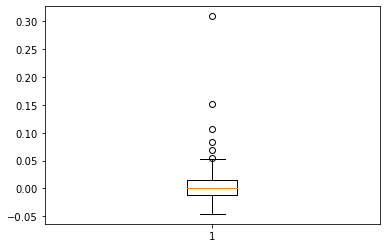

In [78]:
plt.boxplot(diff)

In [81]:
diff = []
for testcase in disable_guards_testcase_times:
    now_data = disable_guards_testcase_times[testcase]
#     print(now_data)
    pre_data = orginal_testcase_times[testcase]
#     print(pre_data)
    stat_test = mannwhitneyu(now_data, pre_data)
    significant = cliffsDelta(now_data, pre_data, 0.474)
#     if (stat_test.pvalue < 0.05):
    now_avg_data = sum(now_data)/len(now_data)
    pre_avg_data = sum(pre_data)/len(pre_data)
    diff.append((now_avg_data - pre_avg_data)/pre_avg_data)
    print(testcase, (now_avg_data - pre_avg_data)/pre_avg_data, stat_test.pvalue, significant, sep="\t")

org.apache.zookeeper.ClientReconnectTest	0.0017209425469949563	0.305266047055035	False
org.apache.zookeeper.SaslAuthTest	0.009640703304170573	0.41789206287013053	False
org.apache.zookeeper.ZooKeeperTest	-0.020938314509122476	0.23116936257153575	False
org.apache.zookeeper.common.TimeTest	-0.0012010981468770889	0.43236700071297	False
org.apache.zookeeper.server.CRCTest	-0.0010236757835057344	0.24280475280103214	False
org.apache.zookeeper.server.DataTreeTest	-0.02615933412604044	0.008544118585995034	True
org.apache.zookeeper.server.DataTreeUnitTest	0.0366666666666667	0.0021325138612384147	True
org.apache.zookeeper.server.DeserializationPerfTest	-0.024175824175823958	0.008795334747658793	True
org.apache.zookeeper.server.InvalidSnapCountTest	0.0044925464570143665	0.020270489275987597	False
org.apache.zookeeper.server.InvalidSnapshotTest	-0.00357471279255041	0.4032367455287309	False
org.apache.zookeeper.server.NIOServerCnxnTest	0.0006603534998735077	0.13689338449754906	False
org.apache.zooke

{'whiskers': [<matplotlib.lines.Line2D at 0x224c32b78d0>,
 'caps': [<matplotlib.lines.Line2D at 0x224c32b7be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x224c32b7588>],
 'medians': [<matplotlib.lines.Line2D at 0x224c32c4438>],
 'fliers': [<matplotlib.lines.Line2D at 0x224c32c4710>],
 'means': []}

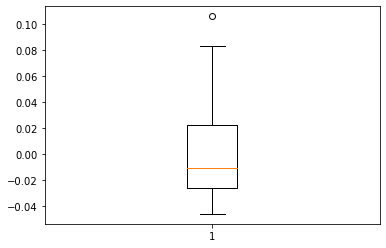

In [80]:
plt.boxplot(diff)

In [33]:
pd.DataFrame.from_dict(disable_guards_testcase_times)[["org.apache.zookeeper.test.FollowerTest", 
                                                      "org.apache.zookeeper.server.persistence.FileTxnSnapLogTest", 
                                                      "org.apache.zookeeper.server.DataTreeTest",
                                                      "org.apache.zookeeper.test.ZooKeeperQuotaTest",
                                                      "org.apache.zookeeper.test.FLERestartTest"
                                                     ]]

org.apache.zookeeper.test.FollowerTest  \
0                                    3.138   
1                                    4.573   
2                                    4.137   
3                                    3.165   
4                                    4.123   
5                                    3.159   
6                                    4.133   
7                                    4.170   
8                                    3.141   
9                                    4.156   
10                                   4.234   
11                                   4.173   
12                                   5.169   
13                                   4.157   
14                                   4.148   
15                                   3.188   
16                                   4.126   
17                                   4.140   
18                                   3.158   
19                                   4.148   
20                                   3.167   
21                                   4.151   
22                                   4.153   
23                                   4.158   
24                                   4.173   
25                                   3.190   
26                                   3.188   
27                                   3.151   
28                                   4.169   
29                                   4.173   
30                                   4.200   
31                                   4.155   
32                                   4.149   
33                                   4.170   
34                                   4.176   
35                                   3.165   
36                                   4.161   
37                                   4.141   
38                                   4.149   
39                                   3.154   
40                                   3.134   
41                                   4.145   
42                                   4.148   
43                                   4.184   
44                                   4.167   
45                                   4.154   

    org.apache.zookeeper.server.persistence.FileTxnSnapLogTest  \
0                                               0.062            
1                                               0.061            
2                                               0.060            
3                                               0.060            
4                                               0.061            
5                                               0.060            
6                                               0.063            
7                                               0.066            
8                                               0.065            
9                                               0.060            
10                                              0.061            
11                                              0.060            
12                                              0.060            
13                                              0.059            
14                                              0.060            
15                                              0.061            
16                                              0.059            
17                                              0.062            
18                                              0.064            
19                                              0.065            
20                                              0.063            
21                                              0.062            
22                                              0.059            
23                                              0.060            
24                                              0.059            
25                                              0.061            
26                                              0.065      

In [34]:
pd.DataFrame.from_dict(orginal_testcase_times)[["org.apache.zookeeper.test.FollowerTest", 
                                                      "org.apache.zookeeper.server.persistence.FileTxnSnapLogTest", 
                                                      "org.apache.zookeeper.server.DataTreeTest",
                                                      "org.apache.zookeeper.test.ZooKeeperQuotaTest",
                                                      "org.apache.zookeeper.test.FLERestartTest"
                                                     ]]

org.apache.zookeeper.test.FollowerTest  \
0                                    4.139   
1                                    3.168   
2                                    4.136   
3                                    4.166   
4                                    4.128   
5                                    5.163   
6                                    5.146   
7                                    4.164   
8                                    4.164   
9                                    5.220   
10                                   4.186   
11                                   4.155   
12                                   4.172   
13                                   4.138   
14                                   4.166   
15                                   5.123   
16                                   3.162   
17                                   5.406   
18                                   4.176   
19                                   4.162   
20                                   4.145   
21                                   5.161   
22                                   4.123   
23                                   4.179   
24                                   4.146   
25                                   4.154   
26                                   3.172   
27                                   3.164   
28                                   5.159   
29                                   4.157   
30                                   4.154   
31                                   4.146   
32                                   3.154   
33                                   6.159   
34                                   4.139   
35                                   4.144   
36                                   4.174   
37                                   4.170   
38                                   4.163   
39                                   4.151   
40                                   5.168   

    org.apache.zookeeper.server.persistence.FileTxnSnapLogTest  \
0                                               0.071            
1                                               0.065            
2                                               0.066            
3                                               0.066            
4                                               0.066            
5                                               0.067            
6                                               0.067            
7                                               0.066            
8                                               0.066            
9                                               0.064            
10                                              0.068            
11                                              0.066            
12                                              0.066            
13                                              0.067            
14                                              0.072            
15                                              0.067            
16                                              0.067            
17                                              0.067            
18                                              0.069            
19                                              0.073            
20                                              0.067            
21                                              0.066            
22                                              0.066            
23                                              0.070            
24                                              0.069            
25                                              0.071            
26                                              0.066            
27                                              0.072            
28                                              0.069            
29                                              0.070            
30                       